In [1]:


#  CSV erkennen by David Maksimovic 24.06.2019
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
#import keras

#from keras import regularizers
from tensorflow import keras
from tensorflow.keras import regularizers, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LeakyReLU, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping
import time
import pickle
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import pydot_ng as pydot
import numpy as np
import glob
import os
import random



########### Normalisieren ###########

#Ist schon normalisiert
########### Normalisieren ###########

#Ist schon normalisiert

In [2]:
### timeflipped 

X= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/X_Beamlike_PID_globalnorm_PMT160andLAPPD5x5_timeflipped_120k_Files_mitTopBottom.pickle","rb"))
Y= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/Y_Beamlike_PID_globalnorm_PMT160andLAPPD5x5_timeflipped_120k_Files_mitTopBottom.pickle","rb"))

In [3]:
training_data = list(zip(X, Y))
import random
random.shuffle(training_data)

for sample in Y[:5]:
    print("Eintrag \n", sample)

X1 =[]
Y1 =[]

for x in training_data[:85000]:
    
    X1.append(x[0])
    Y1.append(x[1])
    
    
XTraining = np.array(X1)
YTraining = np.array(Y1)

X2 =[]
Y2 =[]

for x in training_data[85000:105000]:
    
    X2.append(x[0])
    Y2.append(x[1])
    
    
XVal = np.array(X2)
Yval = np.array(Y2)

X3 =[]
Y3 =[]

for x in training_data[105000:]:
    
    X3.append(x[0])
    Y3.append(x[1])
    
    
XTest = np.array(X3)
YTest = np.array(Y3)

print(XTraining.shape,XVal.shape,XTest.shape)
del X,Y,X1,X2,X3,Y1,Y2,Y3

Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
(85000, 50, 120, 2) (20000, 50, 120, 2) (15005, 50, 120, 2)


Model: "Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
PMT_LAPPD (InputLayer)       [(None, 50, 120, 2)]      0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12000)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 400)               4800400   
_________________________________________________________________
batch_normalization_6 (Batch (None, 400)               1600      
_________________________________________________________________
dropout_6 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 400)               160400    
_________________________________________________________________
batch_normalization_7 (Batch (None, 400)               1600  

Epoch 22/80
84700/85000 [============================>.] - ETA: 0s - loss: 0.3948 - acc: 0.8214
Epoch 00022: val_acc did not improve from 0.80565
85000/85000 [==============================] - 17s 197us/sample - loss: 0.3948 - acc: 0.8214 - val_loss: 0.4257 - val_acc: 0.8031
Epoch 23/80
84800/85000 [============================>.] - ETA: 0s - loss: 0.3909 - acc: 0.8246
Epoch 00023: val_acc did not improve from 0.80565
85000/85000 [==============================] - 17s 200us/sample - loss: 0.3910 - acc: 0.8245 - val_loss: 0.4404 - val_acc: 0.8013
Epoch 24/80
84700/85000 [============================>.] - ETA: 0s - loss: 0.3867 - acc: 0.8261- ETA: 1s - lo
Epoch 00024: val_acc did not improve from 0.80565
85000/85000 [==============================] - 17s 198us/sample - loss: 0.3868 - acc: 0.8261 - val_loss: 0.4352 - val_acc: 0.8000
Epoch 25/80
84700/85000 [============================>.] - ETA: 0s - loss: 0.3862 - acc: 0.8260
Epoch 00025: val_acc did not improve from 0.80565
85000/85000 

Epoch 51/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.3472 - acc: 0.8473
Epoch 00051: val_acc did not improve from 0.81750
85000/85000 [==============================] - 16s 193us/sample - loss: 0.3471 - acc: 0.8473 - val_loss: 0.4565 - val_acc: 0.8066
Epoch 52/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.3434 - acc: 0.8502
Epoch 00052: val_acc did not improve from 0.81750
85000/85000 [==============================] - 16s 193us/sample - loss: 0.3433 - acc: 0.8503 - val_loss: 0.4362 - val_acc: 0.8099
Epoch 53/80
84700/85000 [============================>.] - ETA: 0s - loss: 0.3439 - acc: 0.8485
Epoch 00053: val_acc did not improve from 0.81750
85000/85000 [==============================] - 16s 193us/sample - loss: 0.3440 - acc: 0.8485 - val_loss: 0.4608 - val_acc: 0.8019
Epoch 54/80
84600/85000 [============================>.] - ETA: 0s - loss: 0.3385 - acc: 0.8521
Epoch 00054: val_acc did not improve from 0.81750
85000/85000 [=============

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


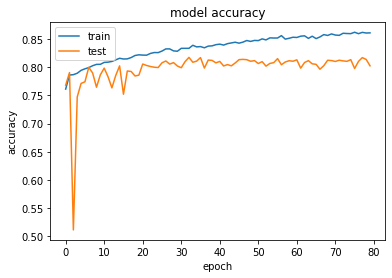

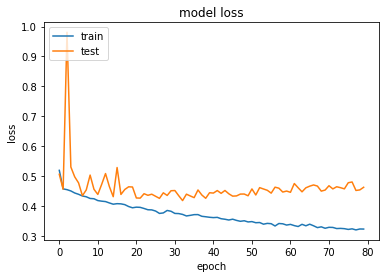

Ende des Versuchs: 


In [6]:
Tiefe = [3]
Batchgrose = [128]
Breite = [600]
# dense_layers = [3]
# layer_sizes = [160]
# conv_layers = [3]
# kernal_size = [(3,3)]
#Ist schon normalisiert

#NAME ="BigData_Beamlike-32k-toy_res"

#tensorboard = TensorBoard(log_dir = 'logs\{}'.format(NAME))


inputDet = tf.keras.Input(shape=XTraining.shape[1:], name='PMT_LAPPD')


x=  layers.Flatten()(inputDet)
x = layers.Dense(400, activation='sigmoid')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(400, activation='sigmoid')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(400, activation='sigmoid')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)

outputs = layers.Dense(2, activation='softmax')(x)



model = tf.keras.Model(inputs=[inputDet], outputs=[outputs], name='Model')

model.summary()


#Model compile
model.compile(
            optimizer='adam',
            #optimizer = keras.optimizers.RMSprop(1e-3),
            loss='categorical_crossentropy',
            metrics=['acc'])


#filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
filepath="Perceptron-PMT+LAPPD_5x5_tf-improvement-val-acc_{val_acc:.2f}.model" 
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
#model Fit
history = model.fit(XTraining,
                    YTraining,
                    batch_size=100,
                    #validation_split=0.2,
                    
                    validation_data=(XVal,Yval),
                    epochs= 80,

                    shuffle=True,
                    class_weight='balanced',
                    callbacks=[
                                #monitor,
                                checkpoint,
                                #tensorboard 
                    ],
                    verbose=1)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("Ende des Versuchs: ")



In [12]:
model = tf.keras.models.load_model("Perceptron-PMT+LAPPD_5x5_tf-improvement-val-acc_0.82.model")

In [8]:
score = model.evaluate(XTest, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.4241596294895326
Test accuracy:  0.8104632


In [13]:
#7541 true e
#7464 true mu

rounded_labels =np.argmax(YTest, axis=1)
y_prob = np.array(model.predict([XTest], batch_size=128, verbose=0))
y_classes = y_prob.argmax(axis=-1)
cm = confusion_matrix(rounded_labels, y_classes)
print(cm)


[[5863 1678]
 [1166 6298]]


In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = ["e", "muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n Perceptron-model with 87.6% accuracy \n PMT+LAPPD (5x5 res) tf')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

Model: "Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
PMT_LAPPD (InputLayer)       [(None, 50, 120, 2)]      0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 12000)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 600)               7200600   
_________________________________________________________________
batch_normalization_13 (Batc (None, 600)               2400      
_________________________________________________________________
dropout_13 (Dropout)         (None, 600)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 600)               360600    
_________________________________________________________________
batch_normalization_14 (Batc (None, 600)               2400  

Epoch 21/50
84800/85000 [============================>.] - ETA: 0s - loss: 0.3969 - acc: 0.8198
Epoch 00021: val_acc did not improve from 0.81205
85000/85000 [==============================] - 18s 210us/sample - loss: 0.3969 - acc: 0.8199 - val_loss: 0.4472 - val_acc: 0.8043
Epoch 22/50
84700/85000 [============================>.] - ETA: 0s - loss: 0.3949 - acc: 0.8218
Epoch 00022: val_acc did not improve from 0.81205
85000/85000 [==============================] - 18s 210us/sample - loss: 0.3949 - acc: 0.8217 - val_loss: 0.4356 - val_acc: 0.8066
Epoch 23/50
84800/85000 [============================>.] - ETA: 0s - loss: 0.3889 - acc: 0.8256
Epoch 00023: val_acc did not improve from 0.81205
85000/85000 [==============================] - 18s 211us/sample - loss: 0.3890 - acc: 0.8255 - val_loss: 0.4793 - val_acc: 0.7713
Epoch 24/50
84900/85000 [============================>.] - ETA: 0s - loss: 0.3848 - acc: 0.8269
Epoch 00024: val_acc did not improve from 0.81205
85000/85000 [=============

Epoch 50/50
84700/85000 [============================>.] - ETA: 0s - loss: 0.3520 - acc: 0.8450
Epoch 00050: val_acc improved from 0.81485 to 0.81620, saving model to Perceptron-PMT+LAPPD_5x5_tf-improvement-val-acc_V2_0.82.model
85000/85000 [==============================] - 21s 247us/sample - loss: 0.3519 - acc: 0.8451 - val_loss: 0.4361 - val_acc: 0.8162
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


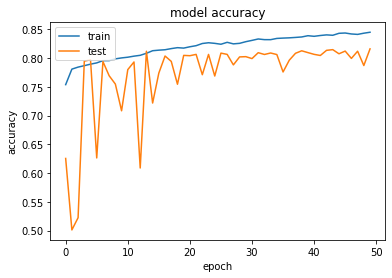

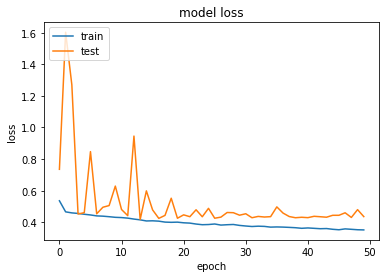

Ende des Versuchs: 


In [10]:
Tiefe = [3]
Batchgrose = [128]
Breite = [600]
# dense_layers = [3]
# layer_sizes = [160]
# conv_layers = [3]
# kernal_size = [(3,3)]
#Ist schon normalisiert

#NAME ="BigData_Beamlike-32k-toy_res"

#tensorboard = TensorBoard(log_dir = 'logs\{}'.format(NAME))


inputDet = tf.keras.Input(shape=XTraining.shape[1:], name='PMT_LAPPD')

x = layers.Flatten()(inputDet)
x = layers.Dense(600, activation='sigmoid')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(600, activation='sigmoid')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(600, activation='sigmoid')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(600, activation='sigmoid')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)

outputs = layers.Dense(2, activation='softmax')(x)



model = tf.keras.Model(inputs=[inputDet], outputs=[outputs], name='Model')

model.summary()


#Model compile
model.compile(
            optimizer='adam',
            #optimizer = keras.optimizers.RMSprop(1e-3),
            loss='categorical_crossentropy',
            metrics=['acc'])


#filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
filepath="Perceptron-PMT+LAPPD_5x5_tf-improvement-val-acc_V2_{val_acc:.2f}.model" 
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
#model Fit
history = model.fit(XTraining,
                    YTraining,
                    batch_size=100,
                    #validation_split=0.2,
                    
                    validation_data=(XVal,Yval),
                    epochs= 50,

                    shuffle=True,
                    class_weight='balanced',
                    callbacks=[
                                #monitor,
                                checkpoint,
                                #tensorboard 
                    ],
                    verbose=1)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("Ende des Versuchs: ")

